# Fetching Tweets using Tweepy

In [33]:
from accesskeys import mytokens

In [34]:
import tweepy

# Variables that contains the credentials to access Twitter API
ACCESS_TOKEN = mytokens.ACCESS_TOKEN #replace mytokens.ACCESS_TOKEN with your key 
ACCESS_SECRET = mytokens.ACCESS_SECRET #replace mytokens.ACCESS_SECRET with your key
CONSUMER_KEY = mytokens.CONSUMER_KEY #replace mytokens.CONSUMER_KEY with your key
CONSUMER_SECRET = mytokens.CONSUMER_SECRET #replace mytokens.CONSUMER_SECRET with your key

# Setup access to API
def connect_to_twitter_OAuth():
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

    api = tweepy.API(auth)
    return api

# Create API object
api = connect_to_twitter_OAuth()

In [51]:
status = trump_tweets[0]
status._json.keys()

dict_keys(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities', 'extended_entities', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive', 'lang'])

In [134]:
trump_tweets
#@realDonaldTrump

[Status(_api=<tweepy.api.API object at 0x000001C54B548358>, _json={'created_at': 'Fri May 24 14:34:20 +0000 2019', 'id': 1131931440105451520, 'id_str': '1131931440105451520', 'text': 'Party colleagues from Kashi gave me the official certificate of election from Varanasi Lok Sabha constituency! \n\nFe… https://t.co/ATgcesk8Kx', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/ATgcesk8Kx', 'expanded_url': 'https://twitter.com/i/web/status/1131931440105451520', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}, 'source': '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 18839785, 'id_str': '18839785', 'name': 'Narendra Modi', 'screen_name': 'narendramodi', 'location': 'India', 'description': 'Prime Minister of 

In [128]:
# tweets from a specific user
trump_tweets = api.user_timeline('@narendramodi',count=200, page=10)
for tweet in trump_tweets:
    print(tweet.text)

Party colleagues from Kashi gave me the official certificate of election from Varanasi Lok Sabha constituency! 

Fe… https://t.co/ATgcesk8Kx
Thank you President @hagegeingob for your good wishes. I look forward to working closely with you to advance our pr… https://t.co/ALelUWc9WG
Thank you @IvankaTrump. Wishes from a true friend of India like you are invaluable. https://t.co/2vppYI8tzm
Thank you President @KagutaMuseveni for your warm message. I look forward to working closely with you to strengthen… https://t.co/39cFM0zZL0
Extremely anguished by the fire tragedy in Surat. My thoughts are with bereaved families. May the injured recover q… https://t.co/lyteFuFuBr
Thank you @10DowningStreet @theresa_may for your wishes. I am committed to further strengthening the strategic part… https://t.co/NrweF6rQmM
Thank you very much @Mohanlal Ji. https://t.co/5ugeWqsCKh
Thank you for the wishes @MangteC. https://t.co/M6ougS9Orw
Thank you @arrahman. Will leave no stone unturned in building an India

In [135]:
import pandas as pd
# fuction to extract data from tweet object
def extract_tweet_attributes(tweet_object):
    # create empty list
    tweet_list =[]
    # loop through tweet objects
    for tweet in tweet_object:
        tweet_id = tweet.id # unique integer identifier for tweet
        text = tweet.text # utf-8 text of tweet
        favorite_count = tweet.favorite_count
        retweet_count = tweet.retweet_count
        tweet_location = tweet.user.location #location of the user's tweet
        tweet_coordinates = tweet.coordinates #Geo coordinates of tweet where available
        created_at = tweet.created_at # utc time tweet created
        source = tweet.source # utility used to post tweet
        reply_to_status = tweet.in_reply_to_status_id # if reply int of orginal tweet id
        reply_to_user = tweet.in_reply_to_screen_name # if reply original tweetes screenname
        retweets = tweet.retweet_count # number of times this tweet retweeted
        favorites = tweet.favorite_count # number of time this tweet liked
        # append attributes to list
        tweet_list.append({'tweet_id':tweet_id, 
                          'text':text, 
                          'tweet_location':tweet_location, 
                          'tweet_coordinates':tweet_coordinates, 
                          'favorite_count':favorite_count,
                          'retweet_count':retweet_count,
                          'created_at':created_at, 
                          'source':source, 
                          'reply_to_status':reply_to_status, 
                          'reply_to_user':reply_to_user,
                          'retweets':retweets,
                          'favorites':favorites})
    # create dataframe   
    df = pd.DataFrame(tweet_list, columns=['tweet_id',
                                           'text',
                                           'tweet_location',
                                           'tweet_coordinates',
                                           'favorite_count',
                                           'retweet_count',
                                           'created_at',
                                           'source',
                                           'reply_to_status',
                                           'reply_to_user',
                                           'retweets',
                                           'favorites'])
    return df


df = extract_tweet_attributes(trump_tweets)

In [136]:
df

,tweet_id,text,tweet_location,tweet_coordinates,favorite_count,retweet_count,created_at,source,reply_to_status,reply_to_user,retweets,favorites
0,1131931440105451520,Party colleagues from Kashi gave me the offici...,India,None,47462,6145,2019-05-24 14:34:20,Twitter Web Client,NaN,None,6145,47462
1,1131912795400724480,Thank you President @hagegeingob for your good...,India,None,19905,2451,2019-05-24 13:20:15,Twitter Web Client,NaN,None,2451,19905
2,1131912786605367301,Thank you @IvankaTrump. Wishes from a true fri...,India,None,57657,6766,2019-05-24 13:20:12,Twitter Web Client,NaN,None,6766,57657
3,1131912232088956930,Thank you President @KagutaMuseveni for your w...,India,None,18905,2431,2019-05-24 13:18:00,Twitter Web Client,NaN,None,2431,18905
4,1131898691415969792,Extremely anguished by the fire tragedy in Sur...,India,None,61886,10059,2019-05-24 12:24:12,Twitter Web Client,NaN,None,10059,61886
5,1131861174792990720,Thank you @10DowningStreet @theresa_may for yo...,India,None,38977,4740,2019-05-24 09:55:07,Twitter for iPhone,NaN,None,4740,38977
6,1131816897039618048,Thank you very much @Mohanlal Ji. https://t.co...,India,None,32484,3253,2019-05-24 06:59:11,Twitter Web Client,NaN,None,3253,32484
7,1131816300747956225,Thank you for the wishes @MangteC. https://t.c...,India,None,30438,2804,2019-05-24 06:56:48,Twitter Web Client,NaN,None,2804,30438
8,1131816193738674176,Thank you @arrahman. Will leave no stone untur...,India,None,34626,3270,2019-05-24 06:56:23,Twitter Web Client,NaN,None,3270,34626
9,1131815998179254272,Thank you @ActorMadhavan. I cherish your good ...,India,None,24108,2776,2019-05-24 06:55:36,Twitter Web Client,NaN,None,2776,24108


### Word Cloud of tweets

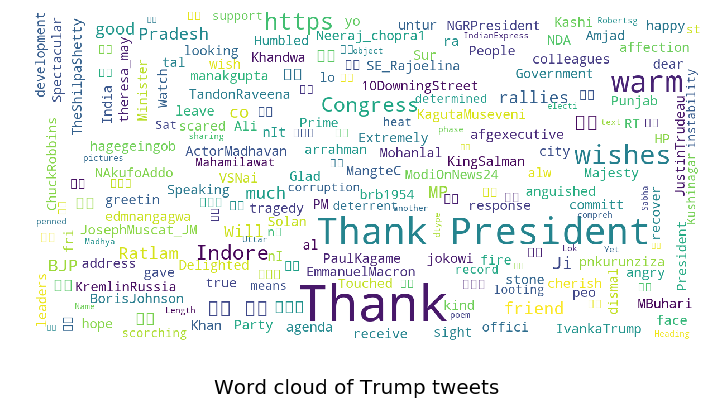

In [131]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=500,
        max_font_size=30, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df['text'], 'Word cloud of Trump tweets')

### Add columns of User handles and Hashtags

In [133]:
import re
def find_twitterhandles(strtweet):
    x = re.findall(r"@(\w+)", strtweet)
    x = ''.join(x)
    return x 

def find_hashtags(strtweet):
    y = re.findall(r"#(\w+)", strtweet)
    y = ''.join(y)
    return y

df['twitterhandles'] = df['text'].apply(lambda x:find_twitterhandles(x))
df['hashtags'] = df['text'].apply(lambda x:find_hashtags(x))
df.head(200)

,tweet_id,text,favorite_count,retweet_count,created_at,source,reply_to_status,reply_to_user,retweets,favorites,twitterhandles,hashtags
0,1131931440105451520,Party colleagues from Kashi gave me the offici...,47462,6145,2019-05-24 14:34:20,Twitter Web Client,NaN,None,6145,47462,,
1,1131912795400724480,Thank you President @hagegeingob for your good...,19905,2451,2019-05-24 13:20:15,Twitter Web Client,NaN,None,2451,19905,hagegeingob,
2,1131912786605367301,Thank you @IvankaTrump. Wishes from a true fri...,57657,6766,2019-05-24 13:20:12,Twitter Web Client,NaN,None,6766,57657,IvankaTrump,
3,1131912232088956930,Thank you President @KagutaMuseveni for your w...,18905,2431,2019-05-24 13:18:00,Twitter Web Client,NaN,None,2431,18905,KagutaMuseveni,
4,1131898691415969792,Extremely anguished by the fire tragedy in Sur...,61886,10059,2019-05-24 12:24:12,Twitter Web Client,NaN,None,10059,61886,,
5,1131861174792990720,Thank you @10DowningStreet @theresa_may for yo...,38977,4740,2019-05-24 09:55:07,Twitter for iPhone,NaN,None,4740,38977,10DowningStreettheresa_may,
6,1131816897039618048,Thank you very much @Mohanlal Ji. https://t.co...,32484,3253,2019-05-24 06:59:11,Twitter Web Client,NaN,None,3253,32484,Mohanlal,
7,1131816300747956225,Thank you for the wishes @MangteC. https://t.c...,30438,2804,2019-05-24 06:56:48,Twitter Web Client,NaN,None,2804,30438,MangteC,
8,1131816193738674176,Thank you @arrahman. Will leave no stone untur...,34626,3270,2019-05-24 06:56:23,Twitter Web Client,NaN,None,3270,34626,arrahman,
9,1131815998179254272,Thank you @ActorMadhavan. I cherish your good ...,24108,2776,2019-05-24 06:55:36,Twitter Web Client,NaN,None,2776,24108,ActorMadhavan,


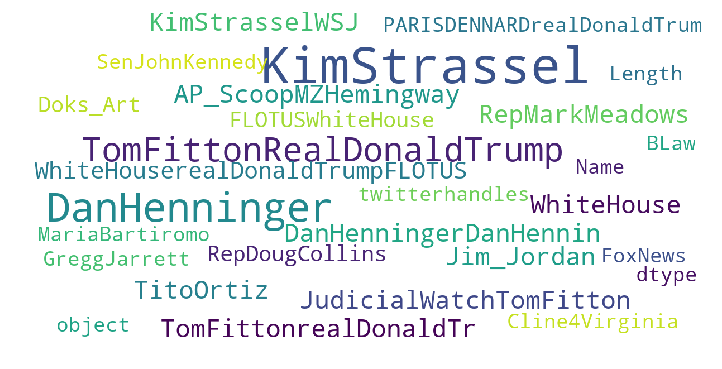

In [119]:
show_wordcloud(df['twitterhandles'])

In [120]:
df['twitterhandles'].value_counts()

                                                     71
KimStrassel                                           5
WhiteHouse                                            5
Jim_Jordan                                            4
GOPChairwoman                                         3
newsmax                                               3
RepMarkMeadows                                        3
realDonaldTrump                                       3
RepMattGaetz                                          3
DanHenninger                                          3
RepDougCollins                                        3
VPrealDonaldTrump                                     3
TomFittonRealDonaldTrump                              2
HouseGOP                                              2
Morlen4Distrct1                                       2
MariaBartiromo                                        2
KimStrasselWSJ                                        1
parscaleRealDonaldTrump                         

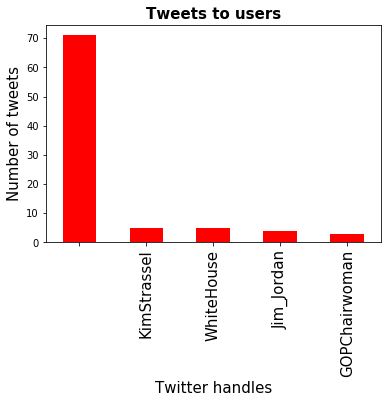

In [121]:
import matplotlib.pyplot as plt

tweets_by_lang = df['twitterhandles'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Twitter handles', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Tweets to users', fontsize=15, fontweight='bold')
tweets_by_lang[:5].plot(ax=ax, kind='bar', color='red')

# Removing user handle 

In [6]:
# removing user handle 
df['tidy_tweet'] = df['text'].replace(to_replace ='(@[\w]+)', value ='', regex = True)
df['tidy_tweet'] = df['tidy_tweet'].replace(to_replace =('RT'), value ='',regex = True) 
df['tidy_tweet']

0                               https://t.co/HvENCXZBYe
1                               https://t.co/kaiJymPjE9
2     Congratulations to  on tonight’s huge WIN, a G...
3      “Schiff’s surveillance (obtaining phone logs)...
4      : 1) Still waiting for my fellow members of t...
5      : Democrats lecture about dirt-digging, even ...
6      : I wondered how long it would be before medi...
7      :  Also from my column: Constitutional lawyer...
8      : From my new column: “There does not appear ...
9      : Impeachment will be the decisive battle in ...
10     : Pelosi’s decision to open the impeachment d...
11     : Nancy Pelosi saw this summer that Adam Schi...
12     : When Trump called the impeachment show a ‘k...
13    The United States Secret Service Deputy Assist...
14    “Not only have the Democrats not advanced key ...
15    “Why re-elect Democrats when you know that thi...
16                Our Economy is the envy of the World!
17    Hard to believe, but if Nancy Pelosi had p

# Remove any links from the tweet

In [7]:
#remove any links from the tweet: Links not required for performing sentiment analysis.
df['tidy_tweet'] = df['tidy_tweet'].str.replace('((www\.[\s]+)|(https?://[^\s]+))','\0',regex=True)
df['tidy_tweet']

0                                                      
1                                                      
2     Congratulations to  on tonight’s huge WIN, a G...
3      “Schiff’s surveillance (obtaining phone logs)...
4      : 1) Still waiting for my fellow members of t...
5      : Democrats lecture about dirt-digging, even ...
6      : I wondered how long it would be before medi...
7      :  Also from my column: Constitutional lawyer...
8      : From my new column: “There does not appear ...
9      : Impeachment will be the decisive battle in ...
10     : Pelosi’s decision to open the impeachment d...
11     : Nancy Pelosi saw this summer that Adam Schi...
12     : When Trump called the impeachment show a ‘k...
13    The United States Secret Service Deputy Assist...
14    “Not only have the Democrats not advanced key ...
15    “Why re-elect Democrats when you know that thi...
16                Our Economy is the envy of the World!
17    Hard to believe, but if Nancy Pelosi had p

# Remove special characters, numbers, punctuations:

In [8]:
# remove special characters, numbers, punctuations: None of them would add any value to the sentiment score.
df['tidy_tweet'] = df['tidy_tweet'].str.replace("[^a-zA-Z]+", " ")

In [9]:
df['tidy_tweet']

0                                                      
1                                                      
2     Congratulations to on tonight s huge WIN a Gre...
3      Schiff s surveillance obtaining phone logs is...
4      Still waiting for my fellow members of the me...
5      Democrats lecture about dirt digging even as ...
6      I wondered how long it would be before media ...
7      Also from my column Constitutional lawyer Dav...
8      From my new column There does not appear to b...
9      Impeachment will be the decisive battle in Wo...
10     Pelosi s decision to open the impeachment dam...
11     Nancy Pelosi saw this summer that Adam Schiff...
12     When Trump called the impeachment show a kang...
13    The United States Secret Service Deputy Assist...
14     Not only have the Democrats not advanced key ...
15     Why re elect Democrats when you know that thi...
16                Our Economy is the envy of the World 
17    Hard to believe but if Nancy Pelosi had pu

# Tokenising and removing Stop Words

In [10]:
df["tidy_tweet"] = df["tidy_tweet"].str.lower()
df["tidy_tweet"] = df["tidy_tweet"].str.split()
from nltk.corpus import stopwords

stop = stopwords.words('english')

In [11]:
df['tidy_tweet']=df['tidy_tweet'].apply(lambda x: [item for item in x if item not in stop])
df['tidy_tweet']

0                                                    []
1                                                    []
2     [congratulations, tonight, huge, win, great, a...
3     [schiff, surveillance, obtaining, phone, logs,...
4     [still, waiting, fellow, members, media, expre...
5     [democrats, lecture, dirt, digging, even, abus...
6     [wondered, long, would, media, rushed, defend,...
7     [also, column, constitutional, lawyer, david, ...
8     [new, column, appear, basis, believe, congress...
9     [impeachment, decisive, battle, world, war, tr...
10    [pelosi, decision, open, impeachment, dam, sta...
11    [nancy, pelosi, saw, summer, adam, schiff, tak...
12    [trump, called, impeachment, show, kangaroo, c...
13    [united, states, secret, service, deputy, assi...
14    [democrats, advanced, key, pieces, legislation...
15      [elect, democrats, know, majority, case, stron]
16                               [economy, envy, world]
17    [hard, believe, nancy, pelosi, put, great,

In [12]:
#Alternate Method: Using TweetTokenizer to tokenize the tweet
from nltk.tokenize import TweetTokenizer

tt = TweetTokenizer()
s0 = "This is a cooool #dummysmiley: :-) :-P <3 and some arrows < > -> <--"
tt.tokenize(s0)

['This',
 'is',
 'a',
 'cooool',
 '#dummysmiley',
 ':',
 ':-)',
 ':-P',
 '<3',
 'and',
 'some',
 'arrows',
 '<',
 '>',
 '->',
 '<--']

In [13]:
def rejoin_words(row):
    my_list = row['tidy_tweet']
    joined_words = ( " ".join(my_list))
    return joined_words

df['tidy_tweet'] = df.apply(rejoin_words, axis=1)

In [14]:
df['tidy_tweet']

0                                                      
1                                                      
2     congratulations tonight huge win great america...
3     schiff surveillance obtaining phone logs unpre...
4     still waiting fellow members media express dee...
5     democrats lecture dirt digging even abuse surv...
6     wondered long would media rushed defend schiff...
7     also column constitutional lawyer david rivkin...
8     new column appear basis believe congressional ...
9     impeachment decisive battle world war trump th...
10    pelosi decision open impeachment dam starting ...
11    nancy pelosi saw summer adam schiff take trump...
12    trump called impeachment show kangaroo court h...
13    united states secret service deputy assistant ...
14    democrats advanced key pieces legislation woul...
15             elect democrats know majority case stron
16                                   economy envy world
17    hard believe nancy pelosi put great trade 

# Applying Lemmatization

In [15]:
import nltk
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

df['tidy_tweet'] = df['tidy_tweet'].apply(lemmatize_text)

In [16]:
df['tidy_tweet']

0                                                    []
1                                                    []
2     [congratulation, tonight, huge, win, great, am...
3     [schiff, surveillance, obtaining, phone, log, ...
4     [still, waiting, fellow, member, medium, expre...
5     [democrat, lecture, dirt, digging, even, abuse...
6     [wondered, long, would, medium, rushed, defend...
7     [also, column, constitutional, lawyer, david, ...
8     [new, column, appear, basis, believe, congress...
9     [impeachment, decisive, battle, world, war, tr...
10    [pelosi, decision, open, impeachment, dam, sta...
11    [nancy, pelosi, saw, summer, adam, schiff, tak...
12    [trump, called, impeachment, show, kangaroo, c...
13    [united, state, secret, service, deputy, assis...
14    [democrat, advanced, key, piece, legislation, ...
15       [elect, democrat, know, majority, case, stron]
16                               [economy, envy, world]
17    [hard, believe, nancy, pelosi, put, great,

In [17]:
def rejoin_words(row):
    my_list = row['tidy_tweet']
    joined_words = ( " ".join(my_list))
    return joined_words

df['tidy_tweet'] = df.apply(rejoin_words, axis=1)

In [18]:
df['tidy_tweet']

0                                                      
1                                                      
2     congratulation tonight huge win great american...
3     schiff surveillance obtaining phone log unprec...
4     still waiting fellow member medium express dee...
5     democrat lecture dirt digging even abuse surve...
6     wondered long would medium rushed defend schif...
7     also column constitutional lawyer david rivkin...
8     new column appear basis believe congressional ...
9     impeachment decisive battle world war trump th...
10    pelosi decision open impeachment dam starting ...
11    nancy pelosi saw summer adam schiff take trump...
12    trump called impeachment show kangaroo court h...
13    united state secret service deputy assistant d...
14    democrat advanced key piece legislation would ...
15              elect democrat know majority case stron
16                                   economy envy world
17    hard believe nancy pelosi put great trade 

In [19]:
df.isnull().sum()

tweet_id            0
text                0
favorite_count      0
retweet_count       0
created_at          0
source              0
reply_to_status    20
reply_to_user      19
retweets            0
favorites           0
tidy_tweet          0
dtype: int64

# Check the Sentiment using TextBlob

In [21]:
#!pip install textblob

In [102]:
TextBlob('It was a worst movie i ever saw.').sentiment[0]

-1.0

In [106]:
TextBlob('They had a gret time in the jungl.').correct()

TextBlob("They had a great time in the jungle.")

In [109]:
TextBlob('The train to Bombay was 30 min late').noun_phrases

WordList(['bombay'])

In [22]:
from textblob import TextBlob
df[['polarity', 'subjectivity']] = df['tidy_tweet'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
df[['text','polarity', 'subjectivity']]

,text,polarity,subjectivity
0,https://t.co/HvENCXZBYe,0.000000,0.000000
1,https://t.co/kaiJymPjE9,0.000000,0.000000
2,Congratulations to @TitoOrtiz on tonight’s hug...,0.500000,0.512500
3,@KimStrassel “Schiff’s surveillance (obtaining...,0.144444,0.633333
4,RT @KimStrassel: 1) Still waiting for my fello...,0.000000,0.400000
5,RT @KimStrassel: Democrats lecture about dirt-...,0.000000,0.000000
6,RT @KimStrassel: I wondered how long it would ...,-0.050000,0.400000
7,RT @KimStrassel: @WSJ Also from my column: Con...,0.000000,0.000000
8,RT @KimStrassel: From my new column: “There do...,0.136364,0.454545
9,RT @DanHenninger: Impeachment will be the deci...,0.000000,0.000000


In [24]:
df['text'][6]

"RT @KimStrassel: I wondered how long it would be before media rushed to defend Schiff's indefensible subpoenas and intimidation of the medi…"

In [88]:
def sent_word(polarity_score):
    if polarity_score>0:
        x = 'pos'
    elif polarity_score<0:
        x = 'neg'
    elif polarity_score==0:
        x = 'neutral'
    else:
        print('provide polarity score.')
    return x

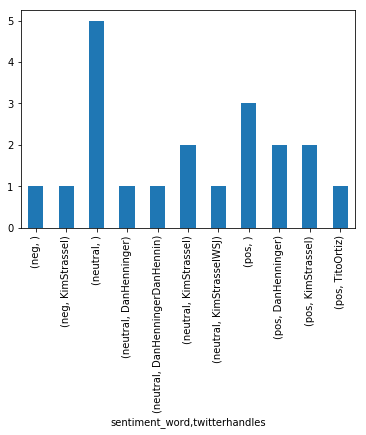

In [96]:
# df['sentiment_word'] = df['polarity'].apply(lambda x: sent_word(x))
df.groupby(['sentiment_word','twitterhandles']).hashtags.count().plot.bar()

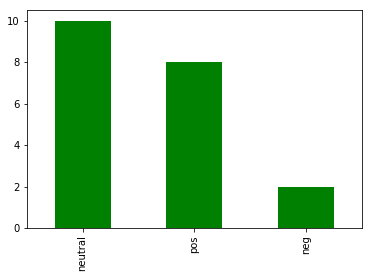

In [94]:
sent_score = df['sentiment_word'].value_counts()

fig, ax = plt.subplots()
sent_score.plot(ax=ax, kind='bar', color='green')

In [25]:
from textblob.sentiments import NaiveBayesAnalyzer
for tweet in df['tidy_tweet']:
    print(tweet)
    analysis = TextBlob(tweet,analyzer=NaiveBayesAnalyzer())
    print(analysis.sentiment)  


Sentiment(classification='pos', p_pos=0.5, p_neg=0.5)

Sentiment(classification='pos', p_pos=0.5, p_neg=0.5)
congratulation tonight huge win great american patriot
Sentiment(classification='pos', p_pos=0.8353882243925617, p_neg=0.16461177560743803)
schiff surveillance obtaining phone log unprecedented abuse power put mildly also illegal
Sentiment(classification='pos', p_pos=0.9330506772525422, p_neg=0.06694932274745446)
still waiting fellow member medium express deep outrage alarm intelligence chair schiff
Sentiment(classification='pos', p_pos=0.9891053590382699, p_neg=0.010894640961731619)
democrat lecture dirt digging even abuse surveillance power demand phone record smear politi
Sentiment(classification='neg', p_pos=0.03034157817363938, p_neg=0.9696584218263651)
wondered long would medium rushed defend schiff indefensible subpoena intimidation medi
Sentiment(classification='pos', p_pos=0.9317016997436932, p_neg=0.06829830025630783)
also column constitutional lawyer david rivkin mak

### Twitter GeoCode analytics

https://github.com/shawn-terryah/Twitter_Geolocation 